In [2]:
import numpy as np
%matplotlib inline
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import pickle

# 8-6. Regularizations

## Overfitting

There are two primary reasons why overfitting happens

1. The representational capability of the network is really high (many layers, many neurons)
1. There is not much training examples

Now let's intentionally reproduce the overfitting situations with the following situations:

1. The network of 10 layers with 300–500 neurons
1. Only 1500 training examples from MNIST (2.5% of the entire training set)

In [7]:
overfitting_log = pickle.load(open('code/08_techniques/08_06_regularizations/08_6_1_overfitting_log.pkl', "rb"))
print("Training accuracy:", overfitting_log["accuracy_train"][-1])
print("Test accuracy:", overfitting_log["accuracy_test"][-1])

Training accuracy: 1.0
Test accuracy: 0.9106


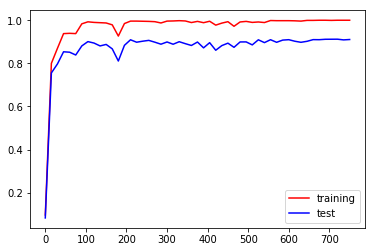

In [8]:
plt.plot(overfitting_log['accuracy_train_itr'], overfitting_log['accuracy_train'], 'r', label='training')
plt.plot(overfitting_log['accuracy_test_itr'], overfitting_log['accuracy_test'], 'b', label='test')
plt.legend()
plt.show()

There are about 9% of differences between training and test accuracy. The gap isn't filled even though running the training for a while.

## L2 Regularization

## Dropout